In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-prediction-based-on-customer-behavior/Test Data.csv
/kaggle/input/loan-prediction-based-on-customer-behavior/Training Data.csv
/kaggle/input/loan-prediction-based-on-customer-behavior/Sample Prediction Dataset.csv


Import the necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

In [ ]:
train_data = pd.read_csv('Training Data.csv')
train_data

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [ ]:
train_data.shape

(252000, 13)

In [ ]:
train_data.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [ ]:
# # Remove unnecessary attribute
# train_data.drop(columns=['Id','CITY'], inplace=True)
# train_data.head()

In [ ]:
train_data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
train_data.select_dtypes(include='object').nunique()

Married/Single       2
House_Ownership      3
Car_Ownership        2
Profession          51
CITY               317
STATE               29
dtype: int64

In [ ]:
train_data.select_dtypes(include='object').value_counts()

Married/Single  House_Ownership  Car_Ownership  Profession            CITY           STATE         
single          rented           no             Secretary             Vijayanagaram  Andhra_Pradesh    144
                                                Librarian             Burhanpur      Madhya_Pradesh    115
                                                Chartered_Accountant  Bangalore      Karnataka         114
                                                Chemical_engineer     Nashik         Maharashtra       114
                                                Hotel_Manager         Indore         Madhya_Pradesh    113
                                                                                                      ... 
                                                Chartered_Accountant  Shimoga        Karnataka           1
                                                                      Shahjahanpur   Uttar_Pradesh       1
                                            

In [ ]:
train_data['Profession'].value_counts()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

In [ ]:
train_data['Profession'].unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

In [ ]:
def segment_profession(profession):
    if profession in ['Mechanical_engineer', 'Design_Engineer', 'Chemical_engineer', 'Biomedical_Engineer',
                      'Computer_hardware_engineer', 'Petroleum_Engineer', 'Civil_engineer',
                      'Industrial_Engineer', 'Technology_specialist']:
        return 'Engineering'
    elif profession in ['Software_Developer', 'Technical_writer', 'Graphic_Designer', 'Web_designer']:
        return 'IT/Software'
    elif profession in ['Civil_servant', 'Politician', 'Police_officer', 'Magistrate', 'Official', 'Army_officer']:
        return 'Government'
    elif profession in ['Librarian', 'Teacher']:
        return 'Education'
    elif profession in ['Economist', 'Financial_Analyst']:
        return 'Finance'
    elif profession in ['Flight_attendant', 'Air_traffic_controller', 'Aviator']:
        return 'Aviation'
    elif profession in ['Architect', 'Designer', 'Fashion_Designer']:
        return 'Design'
    elif profession in ['Physician', 'Dentist', 'Surgeon']:
        return 'Medical Practitioner'
    elif profession in ['Hotel_Manager', 'Chef']:
        return 'Hospitality'
    elif profession == 'Artist':
        return 'Art'
    elif profession in ['Comedian', 'Psychologist']:
        return 'Entertainment'
    elif profession in ['Secretary', 'Computer_operator']:
        return 'Administration'
    elif profession in ['Chartered_Accountant', 'Analyst']:
        return 'Finance/Accounting'
    elif profession in ['Technician', 'Microbiologist', 'Scientist', 'Geologist', 'Statistician']:
        return 'Science/Research'
    else:
        return 'Other'    

In [ ]:
#apply the function to the column to segment the profession
train_data['Profession'] = train_data['Profession'].apply(segment_profession)

In [ ]:
train_data['Profession'].value_counts()

Engineering             45294
Government              28497
Other                   28254
Science/Research        25004
IT/Software             20811
Medical Practitioner    15511
Aviation                15167
Design                  14559
Entertainment           10649
Administration          10051
Hospitality              9813
Finance                  9740
Finance/Accounting       9161
Art                      4861
Education                4628
Name: Profession, dtype: int64

<Axes: >

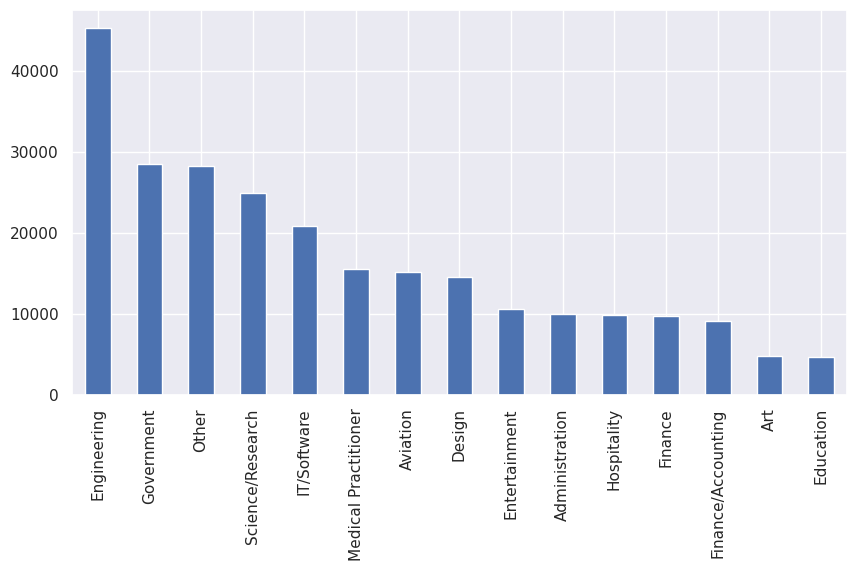

In [ ]:
plt.figure(figsize=(10,5))
train_data['Profession'].value_counts().plot(kind='bar')

<Axes: >

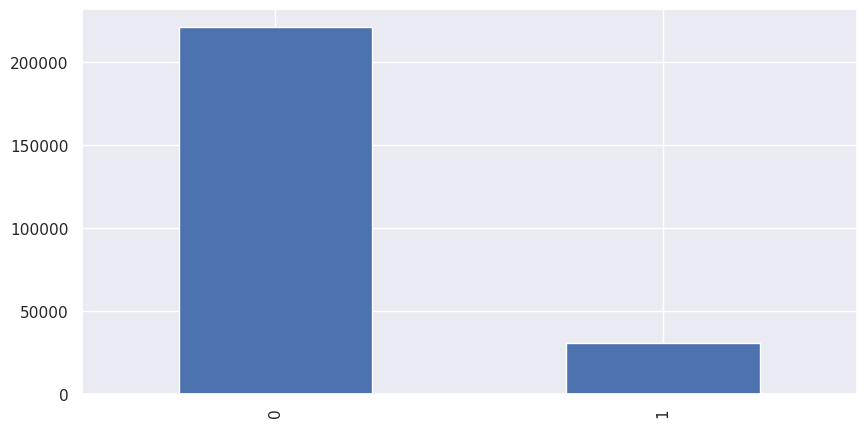

In [ ]:
plt.figure(figsize=(10,5))
train_data['Risk_Flag'].value_counts().plot(kind='bar')

In [ ]:
train_data['Risk_Flag'].value_counts(normalize = True)

0    0.877
1    0.123
Name: Risk_Flag, dtype: float64

In [ ]:
train_data['STATE'].unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

In [ ]:
#segment into unique

def segment_state(state):
    if state in ['Rajasthan', 'Maharashtra', 'Gujarat', 
                 'Daman & Diu', 'Dadra & Nagar Haveli', 
                 'Maharashtra','Goa', 'Madhya_Pradesh']:
        return 'West Zone'
    elif state in ['Andhra Pradesh', 'Andhra_Pradesh', 'Karnataka', 'Lakshadweep',
                   'Kerala', 'Tamil Nadu', 'Tamil_Nadu', 'Puducherry',
                   'Andaman & Nicobar']:
        return 'South Zone'
    elif state in ['Jammu & Kashmir', 'Jammu_and_Kashmir','Himachal Pradesh', 'Himachal_Pradesh', 'Punjab',
                  'Chandigarh', 'Uttarakhand', 'Haryana', 'Telangana',
                  'Delhi', 'Uttar Pradesh', 'Uttar_Pradesh','Uttar_Pradesh[5]']:
        return 'North Zone'
    elif state in ['Bihar', 'Sikkim', 'Arunachal Pradesh', 'Arunachal_Pradesh', 
                   'Nagaland','Manipur', 'Mizoram',
                  'Tripura', 'Meghalaya', 'Assam',
                  'West Bengal', 'West_Bengal','Jharkhand', 'Odisha',
                  'Chhattisgarh']:
        return 'East Zone'
    else:
        return 'Unknown'
    

In [ ]:
train_data['STATE'].unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

In [ ]:
#apply the function to the column to segment the state
train_data['zone'] = train_data['STATE'].apply(segment_state)

In [ ]:
train_data['zone'].value_counts()

East Zone     70897
South Zone    60927
West Zone     60266
North Zone    59910
Name: zone, dtype: int64

In [ ]:
# train_data[train_data['zone'] == 'Unknown']['STATE'].value_counts()

<Axes: >

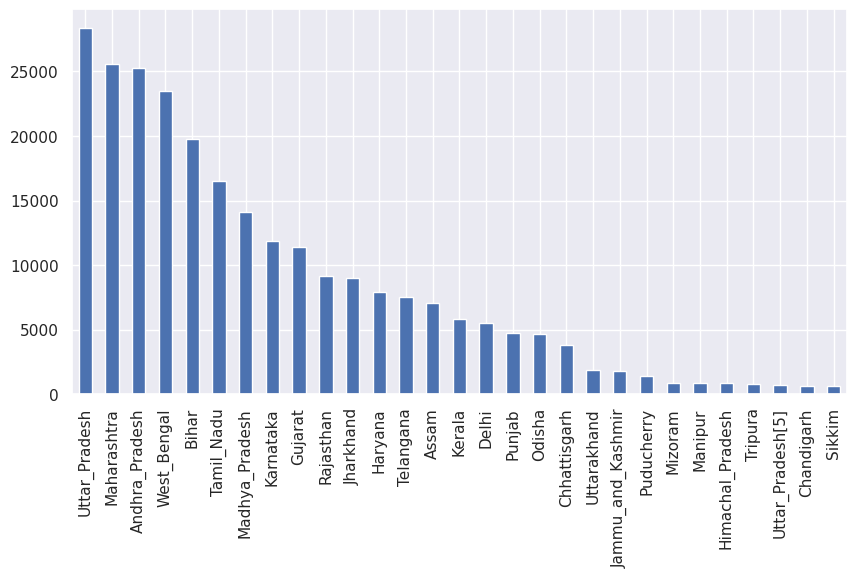

In [ ]:
plt.figure(figsize=(10,5))
train_data['STATE'].value_counts().plot(kind='bar')

<Axes: >

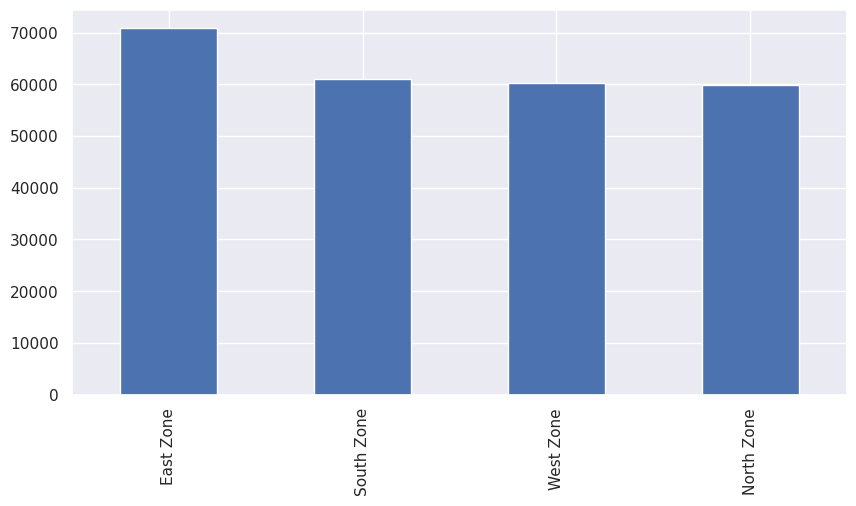

In [ ]:
plt.figure(figsize=(10,5))
train_data['zone'].value_counts().plot(kind='bar')

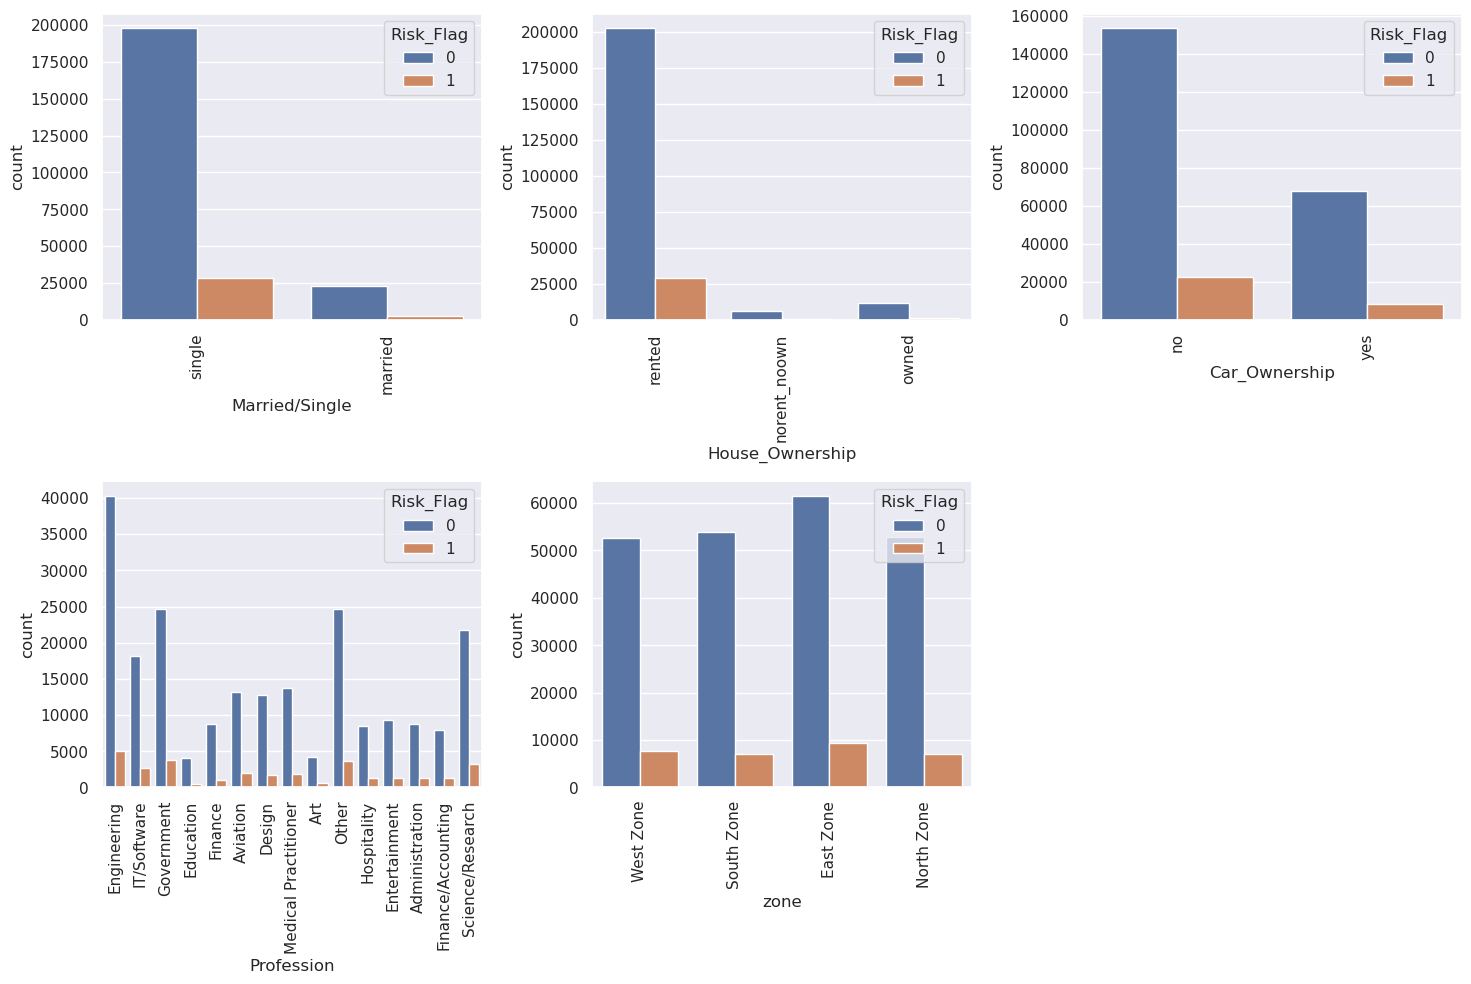

In [ ]:
# list of categorical variables to plot
cat_vars = ['Married/Single', 'House_Ownership', 'Car_Ownership',
            'Profession', 'zone']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Risk_Flag', data=train_data, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# remove the sixth subplot
fig.delaxes(axs[5])

# show plot
plt.show()

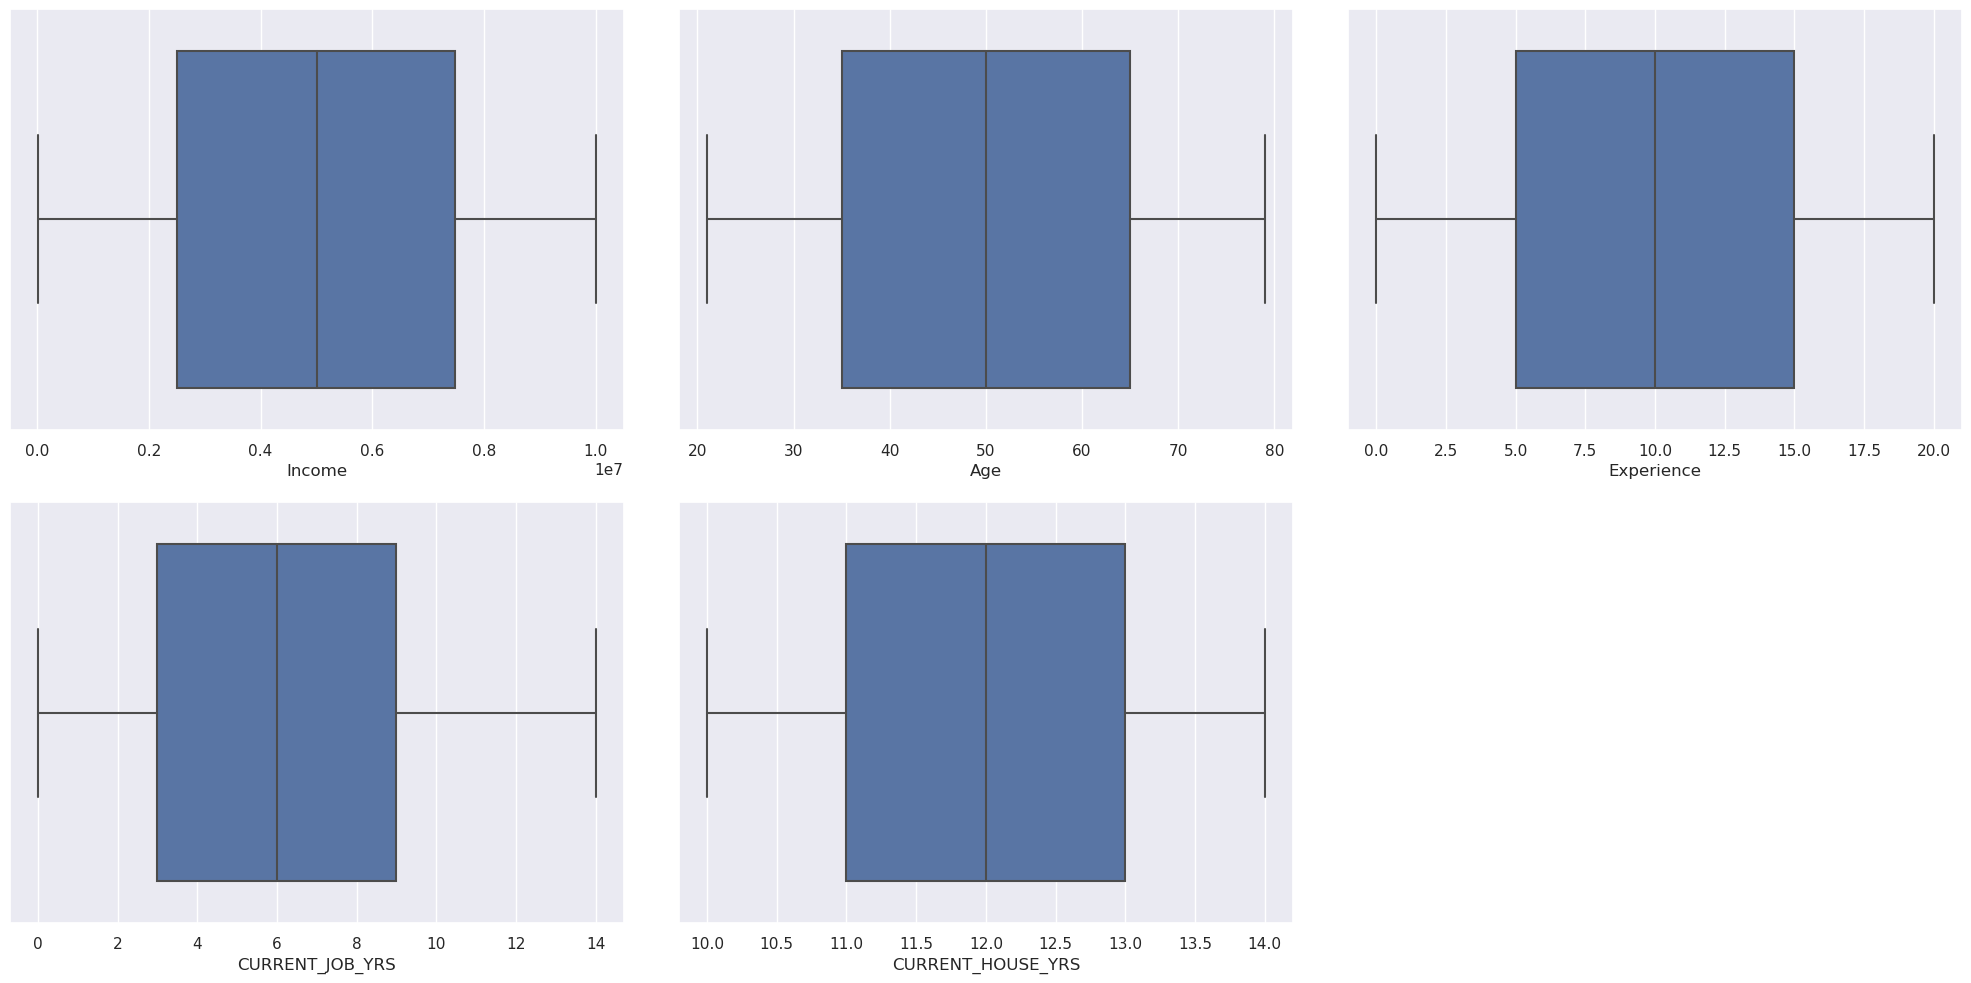

In [ ]:
num_vars = ['Income', 'Age', 'Experience', 
            'CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=train_data, ax=axs[i])

fig.tight_layout()

# remove the sixth subplot
fig.delaxes(axs[5])

plt.show()

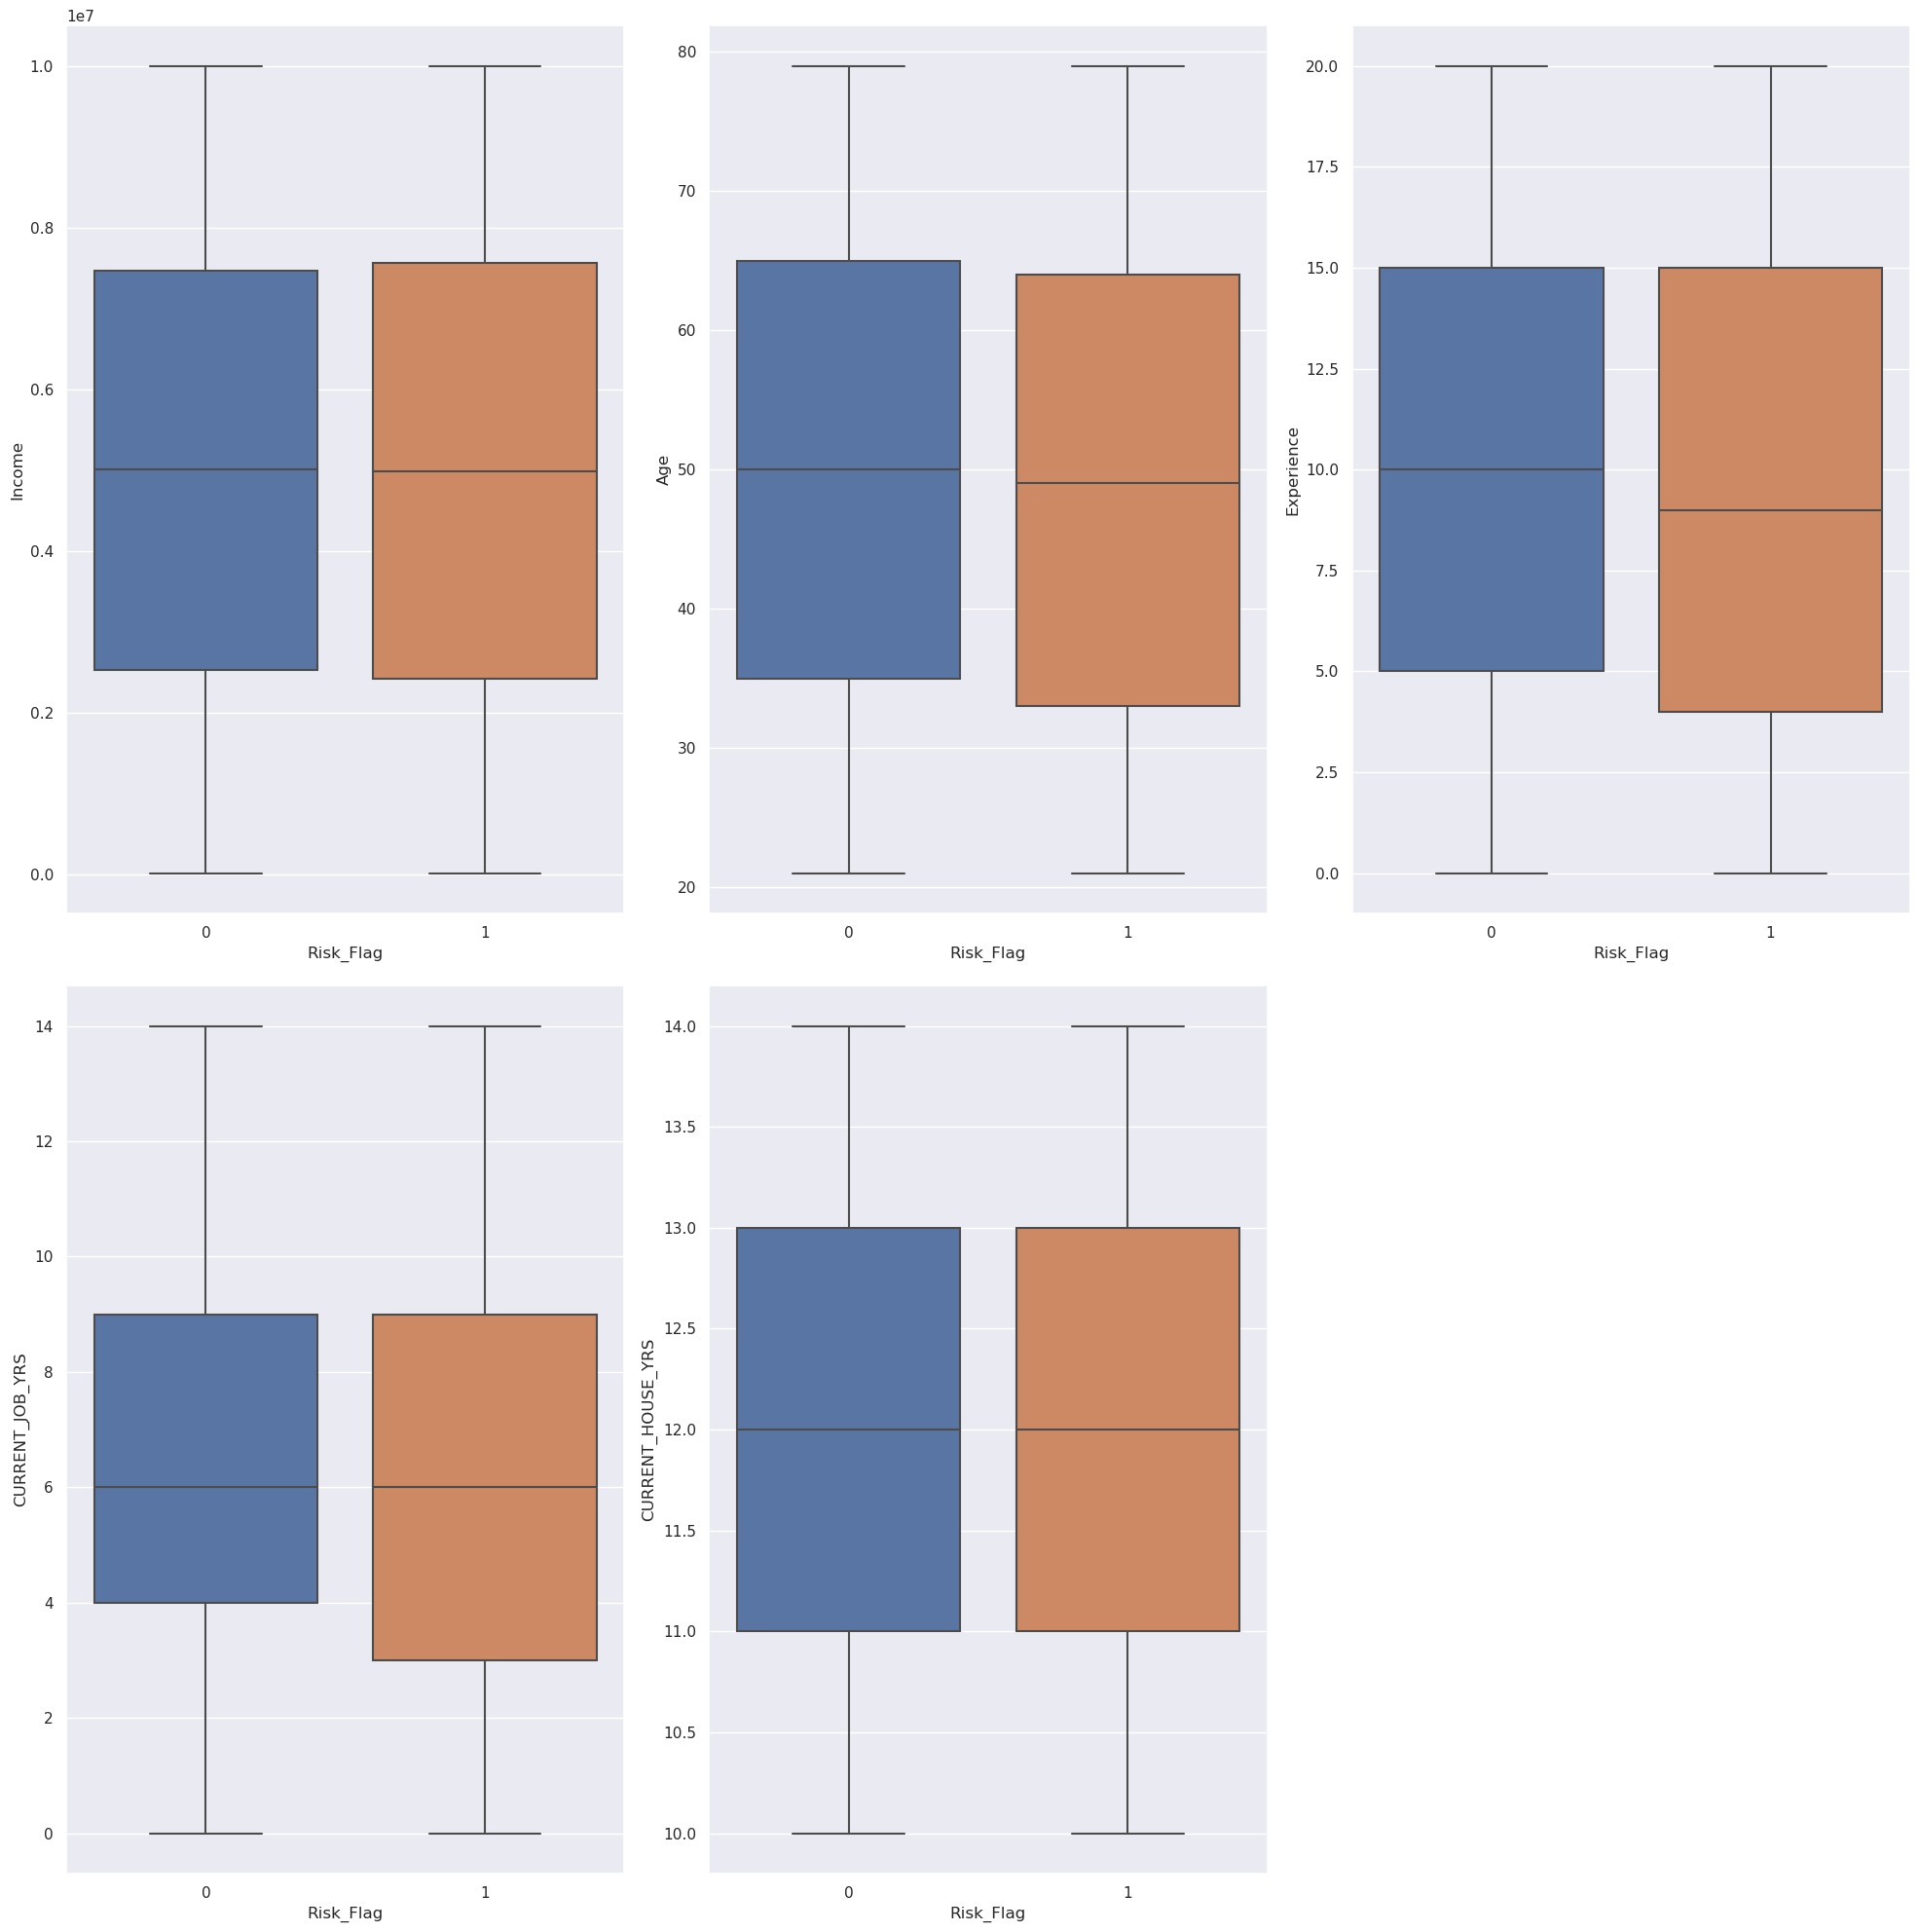

In [ ]:
num_vars = ['Income', 'Age', 'Experience', 
            'CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(y=var, x='Risk_Flag', data=train_data, ax=axs[i])

fig.tight_layout()

# remove the sixth subplot
fig.delaxes(axs[5])

plt.show()

In [ ]:
#Check missing value
check_missing = train_data.isnull().sum() * 100 / train_data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [ ]:
#check_missing

In [ ]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in train_data.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {train_data[col].unique()}")

Married/Single: ['single' 'married']
House_Ownership: ['rented' 'norent_noown' 'owned']
Car_Ownership: ['no' 'yes']
Profession: ['Engineering' 'IT/Software' 'Government' 'Education' 'Finance' 'Aviation'
 'Design' 'Medical Practitioner' 'Art' 'Other' 'Hospitality'
 'Entertainment' 'Administration' 'Finance/Accounting' 'Science/Research']
CITY: ['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli[10]'
 'Jalgaon' 'Tiruppur' 'Jamnagar' 'Kota[6]' 'Karimnagar' 'Hajipur[31]'
 'Adoni' 'Erode[17]' 'Kollam' 'Madurai' 'Anantapuram[24]' 'Kamarhati'
 'Bhusawal' 'Sirsa' 'Amaravati' 'Secunderabad' 'Ahmedabad' 'Ajmer'
 'Ongole' 'Miryalaguda' 'Ambattur' 'Indore' 'Pondicherry' 'Shimoga'
 'Chennai' 'Gulbarga' 'Khammam' 'Saharanpur' 'Gopalpur' 'Amravati' 'Udupi'
 'Howrah' 'Aurangabad[39]' 'Hospet' 'Shimla' 'Khandwa' 'Bidhannagar'
 'Bellary' 'Danapur' 'Purnia[26]' 'Bijapur' 'Patiala' 'Malda' 'Sagar'
 'Durgapur' 'Junagadh' 'Singrauli' 'Agartala' 'Thanjavur' 'Hindupur'
 'Naihati' 'North_Dumdum' 'Pan

In [ ]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in train_data.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(train_data[col].unique())
    
    # Transform the column using the encoder
    train_data[col] = label_encoder.transform(train_data[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {train_data[col].unique()}")

Married/Single: [1 0]
House_Ownership: [2 0 1]
Car_Ownership: [0 1]
Profession: [ 5 11  9  4  7  2  3 12  1 13 10  6  0  8 14]
CITY: [251 227   8  54 296 130 299 134 165 149 113   0  91 163 178  21 145  55
 274  12 264   3   6 218 191  15 126 233 268  70 106 154 255 103  16 303
 121  25 119 267 155  57  38  75 237  59 228 181 254  89 141 273   1 291
 118 206 217 223  20 265  35 202 146 116  40 135 123  56 166 276 285   5
  23  81  90 305   9 278  39  98 277 200 239 244  14 151 167 311 182 160
 203 205 281  77  42 275 188  87  45 101 168  69  86 224  51 194 144 104
 226 272  63 229 246 220 192   7 263 196 131 129 307 150  74 234 124 315
 138  64 210  71 137  83 105  97 240 159 309  37 298 301  73 170 110 199
  24  46  22 198 297 197 184 211 142  17 157  13   2 249 284  80  53 115
 252  88 164  30 269 294 312  94 209 176 293 204 100  67 133 143  82  43
  31  96 231  10 107 290  92 310 222 195  28 283  65 230 186 183  11 179
 180 117  58  93 173 288  32  18 102  36 187 242 256 214  47 193

<Axes: >

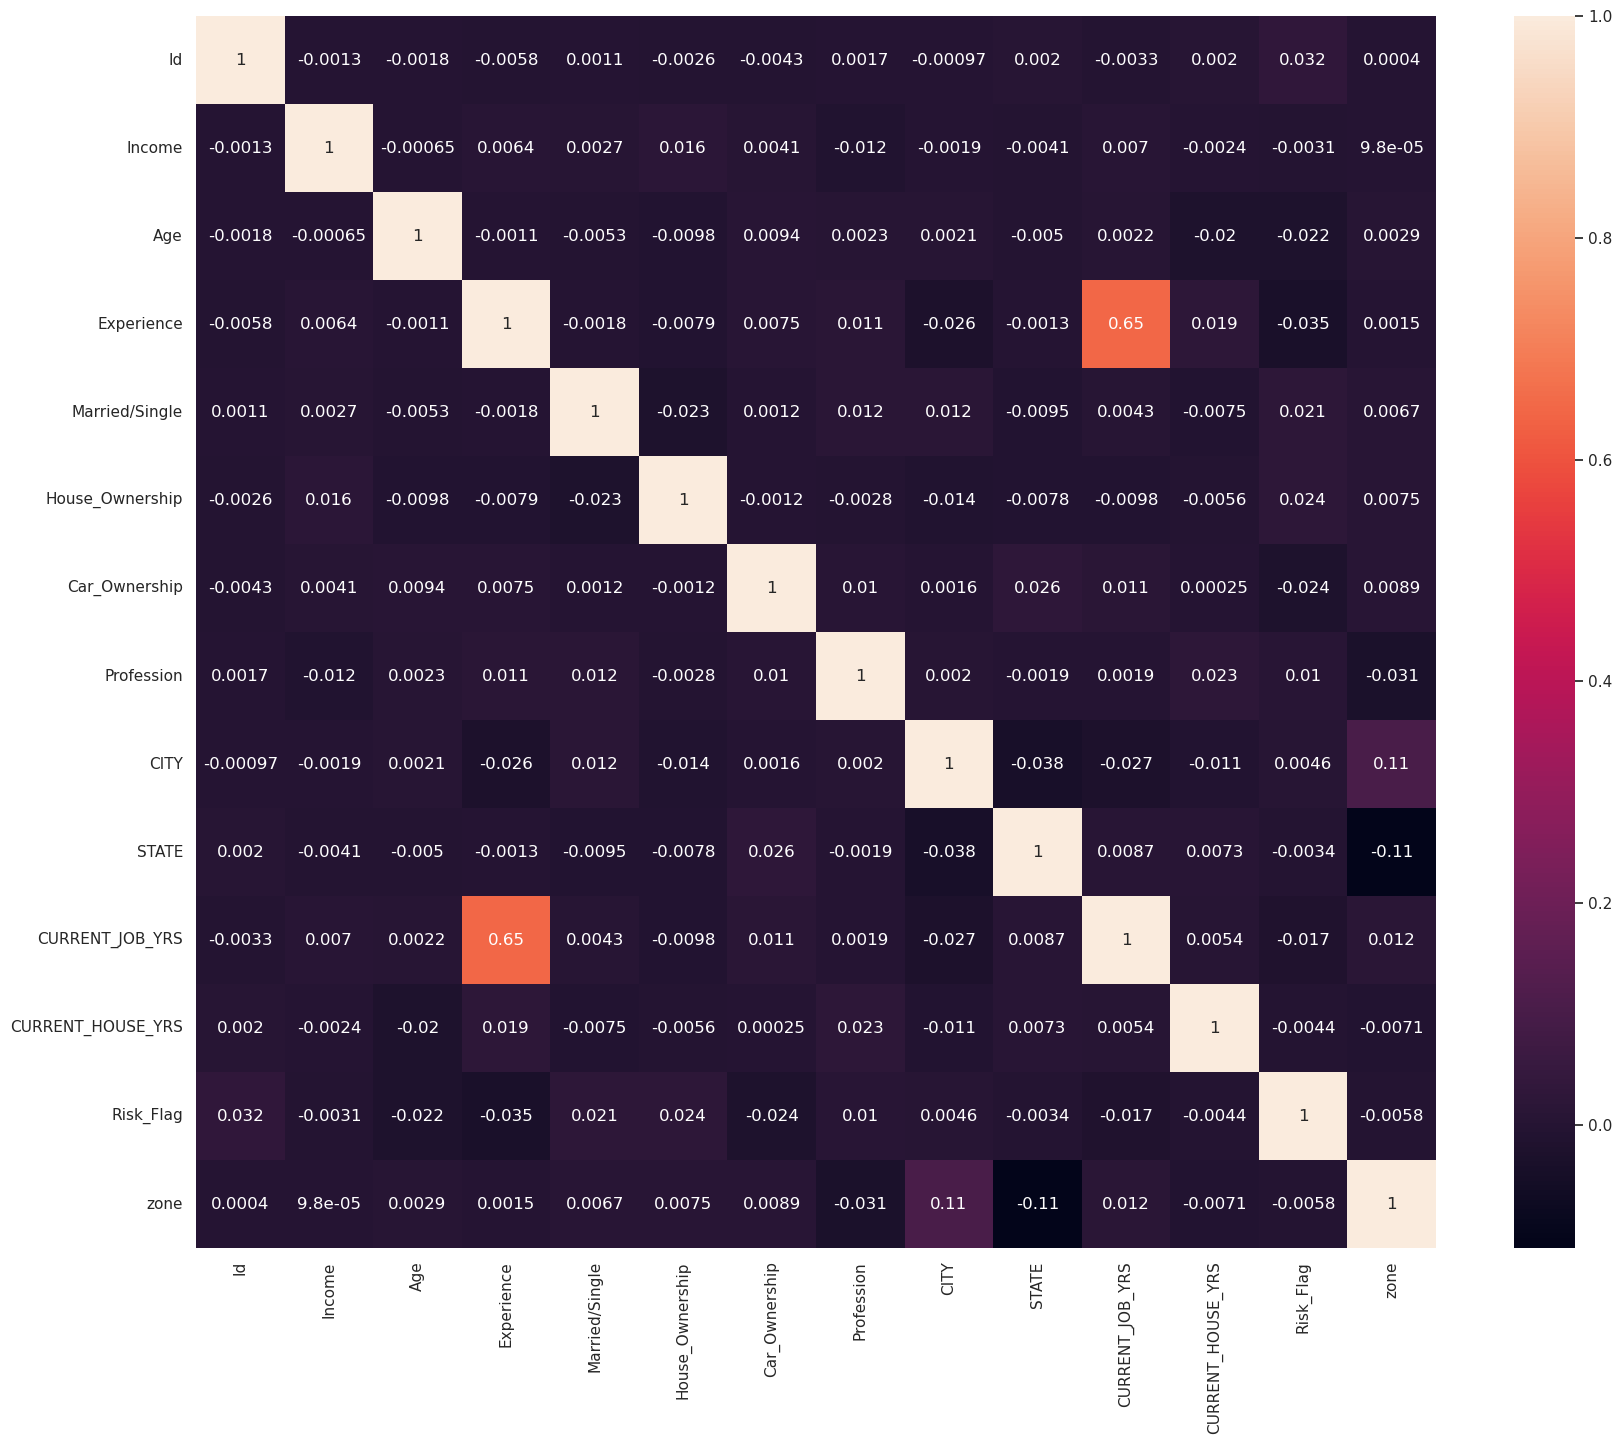

In [ ]:
#Correlation Heatmap (print the correlation score each variables)
plt.figure(figsize=(20, 16))
sns.heatmap(train_data.corr(), fmt='.2g', annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
# Select the features (X) and the target variable (y)
X = train_data.drop(['Risk_Flag', 'STATE'],axis=1)
y = train_data['Risk_Flag']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Training the model using Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_leaf=1, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 53.94 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.5394047619047619
Precision Score :  0.5394047619047619
Recall Score :  0.5394047619047619
Jaccard Score :  0.36930475181351374
Log Loss :  16.60153511458265


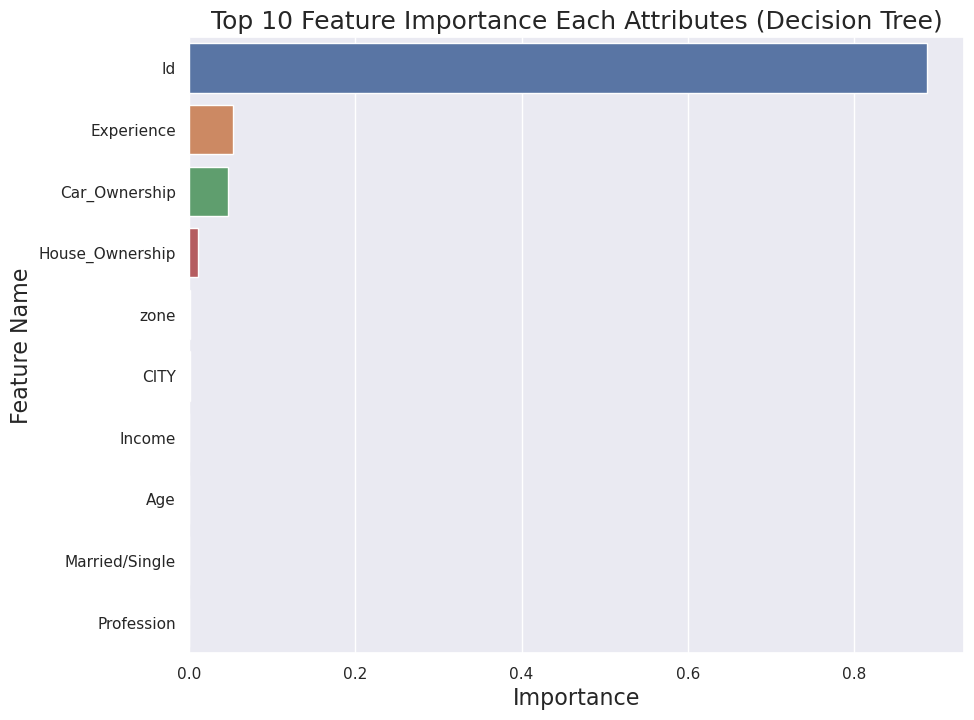

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

/opt/conda/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/opt/conda/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max_swap_size=100, num_

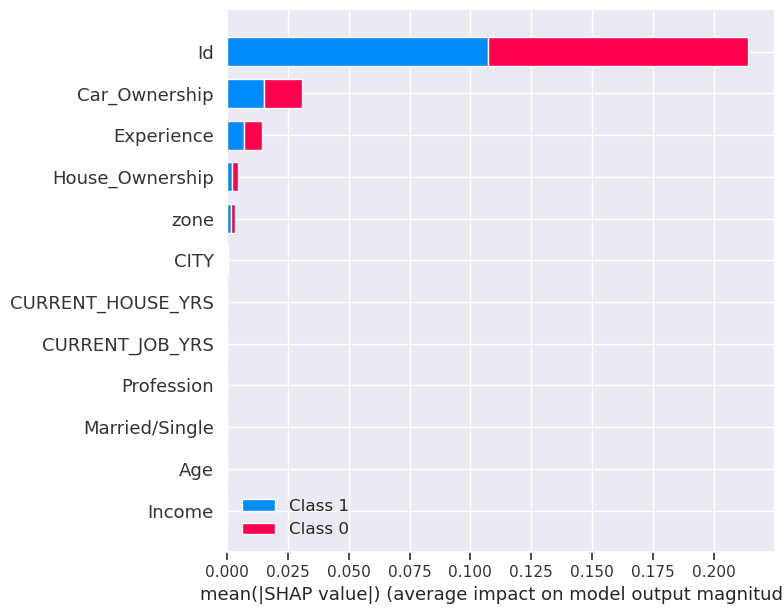

In [ ]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


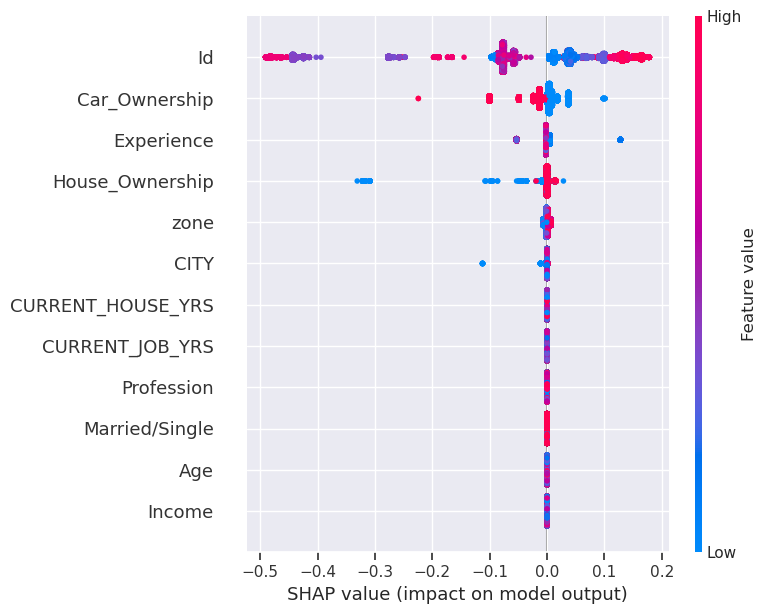

In [ ]:
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.5394047619047619')

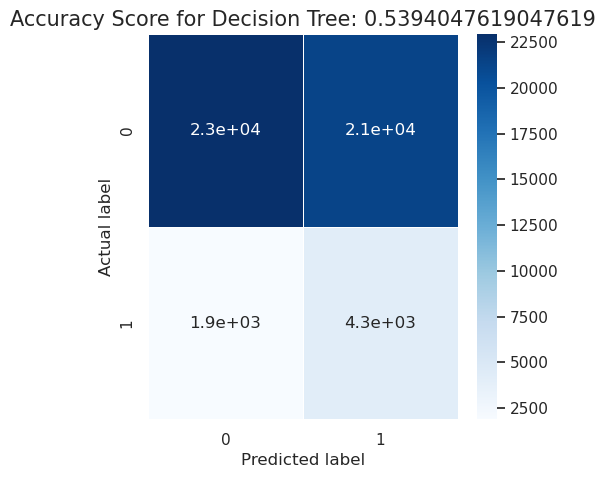

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

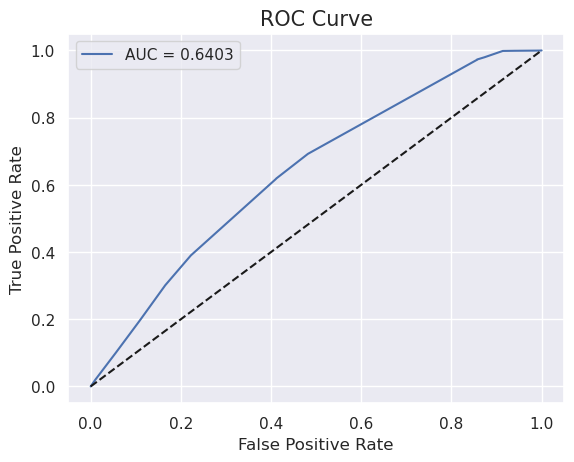

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

Random Forest: Training multiple Decision Trees

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=200, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=0)

In [ ]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 91.0 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.9099603174603175
Precision Score :  0.9099603174603175
Recall Score :  0.9099603174603175
Jaccard Score :  0.8347955877534675
Log Loss :  3.2453591087264617


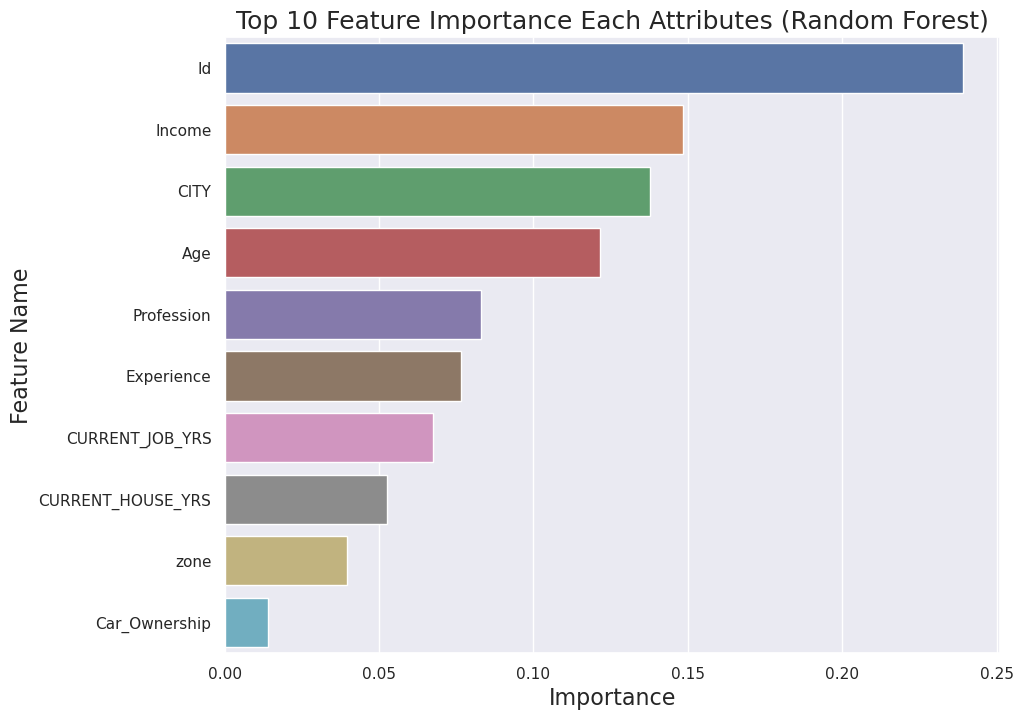

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()